## CLASE 7

### Histogram

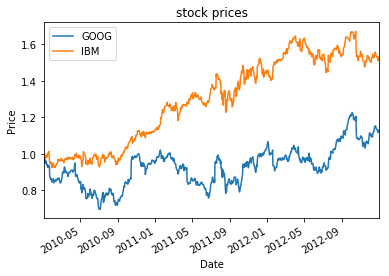

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df,columns,start_index,end_index):
    plot_data(df.loc[start_index:end_index,columns])

def plot_data(df,title="stock prices"):
    ax=df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    

def normalize_data(df):
    return (df/df.iloc[0,:])

def get_data(symbols,dates):
    
    start_date = dates.date[1]
    end_date = dates.date[-1]
    
    dates = pd.date_range(start_date,end_date)    
    df1 = pd.DataFrame(index=dates) 

    dfSPY = pd.read_csv("SPY.csv", index_col="Date", parse_dates=True, usecols=['Date','Adj Close'])
    
    dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})

    df1 = df1.join(dfSPY,how='inner')

    for symbol in symbols:  
        if(symbol!='SPY'):
            data=pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates=True, usecols=['Date','Adj Close'])
            dftemp = data.rename(columns={'Adj Close':symbol})
            df1=df1.join(dftemp)
    df1 = df1[symbols]
    return(df1)

if __name__ == "__main__":
    symbols = ['GOOG','IBM']
    dates = pd.date_range('2010-01-01','2012-12-31')
    df = get_data(symbols,dates)
    plot_data(normalize_data(df))
    plt.show()

## DAILY RETURNS HISTOGRAM

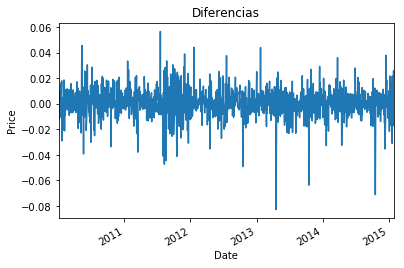

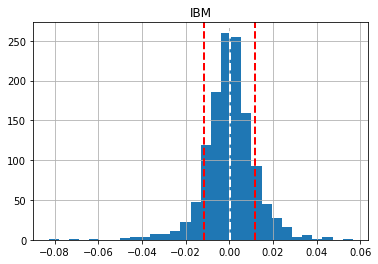

La media es  IBM    0.000259
dtype: float64
La desviacion es  IBM    0.011749
dtype: float64


In [95]:


def daily_returns(df):
    daily = df.copy()
    daily[1:] = (daily[1:]/daily[:-1].values)-1
    daily.iloc[0,:]=0
    return(daily)

symbols =['IBM']
dates = pd.date_range('2010-01-01','2015-01-31')
df = get_data(symbols,dates)
salida = daily_returns(df)
plot_data(salida['IBM'],title='Diferencias')
media = salida['IBM'].mean()
desviacion = salida['IBM'].std()
salida.hist(bins=30)
plt.axvline(media,color='w',linestyle='dashed',linewidth=2)
plt.axvline(media+desviacion,color='r',linestyle='dashed',linewidth=2)
plt.axvline(media-desviacion,color='r',linestyle='dashed',linewidth=2)

plt.show()

print('La media es ', salida.mean())
print('La desviacion es ',salida.std())


## DAILY RETURNS - SCATTER PLOT

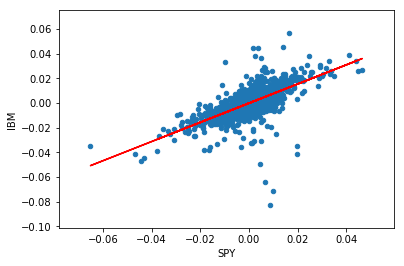

el beta es 0.7768012485677935
el alpha es -0.00018569624823045388


In [103]:
import numpy as np


symbols =['IBM','SPY']
dates = pd.date_range('2010-01-01','2015-01-31')
df = get_data(symbols,dates)
d_returns = daily_returns(df)

d_returns.plot(kind='scatter',y='IBM',x='SPY')

beta , alpha = np.polyfit(d_returns['SPY'],d_returns['IBM'],1)

plt.plot(d_returns['SPY'],d_returns['SPY']*beta+alpha,'-',color='r')
plt.show()

print('el beta es',beta)
print('el alpha es',alpha)
